In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
df = pd.read_csv('fcc-forum-pageviews.csv',  parse_dates=True, index_col= 'date')

In [76]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df=df.drop(df[(df['value'] < df['value'].quantile(0.025)) | (df['value'] > df['value'].quantile(0.975))].index)

In [77]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<AxesSubplot:title={'center':'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

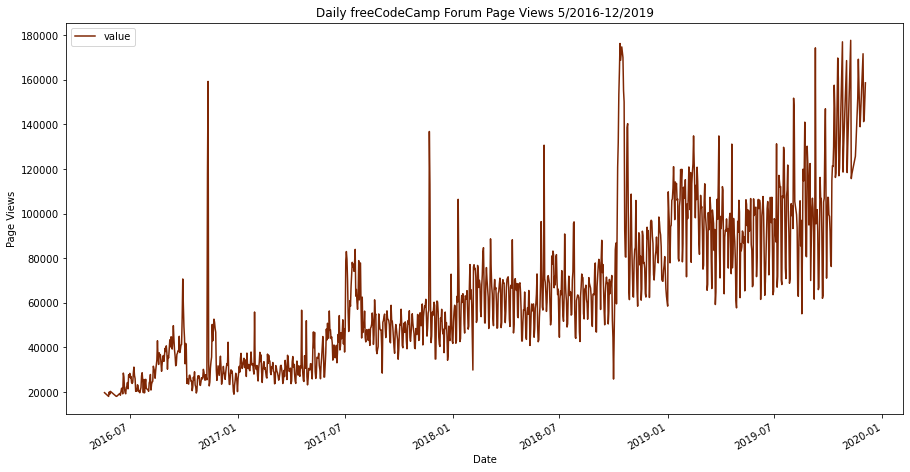

In [78]:
df.plot(figsize=(15,8), colormap= 'Oranges_r', xlabel = 'Date', ylabel ='Page Views', title ='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [79]:
#Create a draw_bar_plot function
df_bar = df.copy()

In [102]:
df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month
df_bar['Month'].replace({ 1: 'January', 2 :'February', 3: 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 
             8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'}, inplace = True)


Text(0, 0.5, 'Average Page Views')

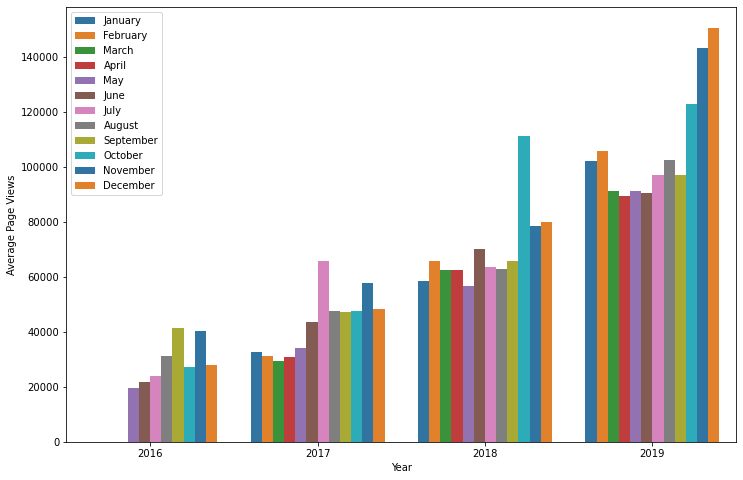

In [134]:
plt.figure (figsize = (12, 8))
sns.barplot(data = df_bar, x='Year', y ='value', hue ='Month', ci = None, hue_order= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December'], palette ='tab10')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Average Page Views')

In [155]:
df_bar['Month'] = df_bar['Month'].str[0:3]

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

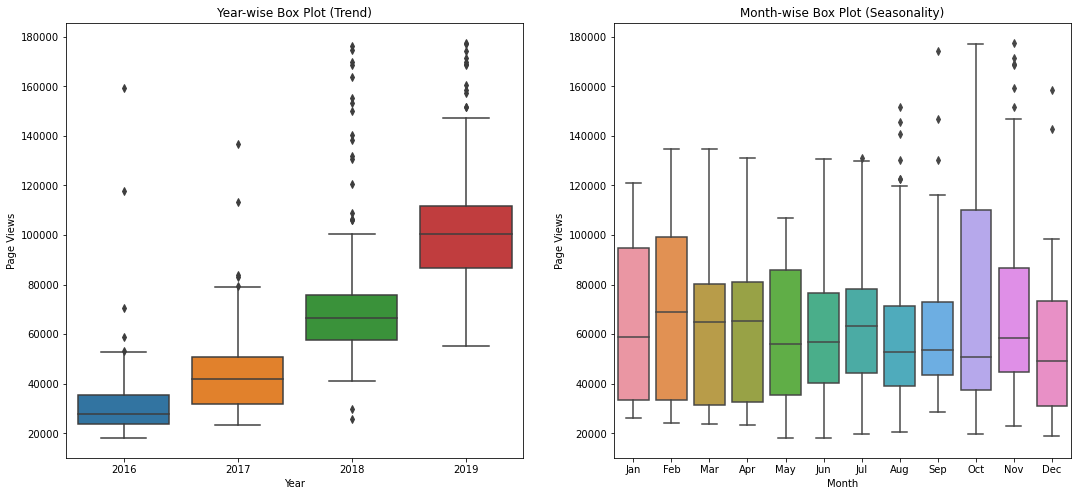

In [167]:
#Create a draw_box_plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,8))
sns.boxplot(ax = ax1, data = df_bar, x = 'Year', y = 'value')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot (Trend)')
sns.boxplot(ax =ax2, data = df_bar, x = 'Month', order =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], y = 'value')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot (Seasonality)')